# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [26]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [22]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [6]:
#  1. Get the total rides for each city type
ride_count_type=pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [28]:
# 2. Get the total drivers for each city type
driver_count_type=city_data_df.groupby(["type"]).sum()["driver_count"].unique()
driver_count_type

array([  78,  490, 2405], dtype=int64)

In [8]:
#  3. Get the total amount of fares for each city type
total_fare_type=pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_type=total_fare_type/ride_count_type
avg_fare_per_ride_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [29]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_type=total_fare_type/driver_count_type
avg_fare_per_driver_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
Name: fare, dtype: float64

In [44]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df=pd.DataFrame({"Total Rides":ride_count_type.map("{:,.0f}".format),
                       "Total Drivers":driver_count_type,
                       "Total Fares":total_fare_type.map("${:,.2f}".format),
                       "Average Fare per Ride":avg_fare_per_ride_type.map("${:,.2f}".format),
                       "Average Fare per Driver":avg_fare_per_driver_type.map("${:,.2f}".format)})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625",2405,"$39,854.38",$24.53,$16.57


In [37]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [31]:
#  8. Format the columns.
#formated while creating the data frame

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [45]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [57]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_time_df = pyber_data_df.groupby(["type", "date"])['fare'].sum()
type_time_df.head(2)

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
Name: fare, dtype: float64

In [71]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_time_df = type_time_df.reset_index()
type_time_df['date']= pd.to_datetime(type_time_df['date'])
type_time_df.dtypes

index             int64
type             object
date     datetime64[ns]
fare            float64
dtype: object

In [72]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_time_pivot = type_time_df.pivot(index="date", columns="type", values="fare")
type_time_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [106]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
type_time_20190101_20190429 = type_time_pivot.loc['2019-01-01':'2019-04-28']
type_time_20190101_20190429.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43
2019-04-28 17:38:09,NaN,34.87,NaN
2019-04-28 19:35:03,NaN,16.96,NaN


In [107]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
type_time_20190101_20190429.index = pd.to_datetime(type_time_20190101_20190429.index)

In [108]:
# 7. Check that the datatype for the index is datetime using df.info()
type_time_20190101_20190429.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [111]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_type_time_20190101_20190429 = type_time_20190101_20190429.resample('W').sum()
weekly_type_time_20190101_20190429.tail()

type,Rural,Suburban,Urban
date,,,
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


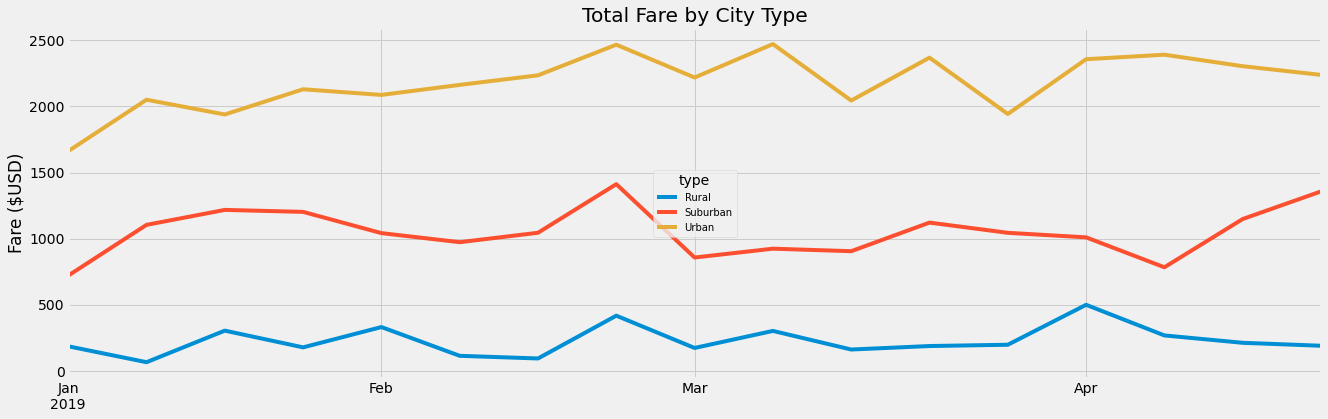

In [113]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

weekly_rides = weekly_type_time_20190101_20190429.plot(figsize=(20,6))

# Add a title and axis labels
weekly_rides.set_title("Total Fare by City Type")
weekly_rides.set_ylabel("Fare ($USD)")
weekly_rides.set_xlabel("")
lgnd = plt.legend(fontsize="10", mode="Expanded",
        scatterpoints=2, loc="best", title="type")
#plt.tight_layout()
#plt.xlim(0, 16)
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()


In [ ]:
# Save Figure
